In [1]:
import numpy as np
import simpleaudio as sa
from pydub import AudioSegment
from pydub.playback import _play_with_simpleaudio
import librosa
import librosa.display
import pygame


# Load MP3 file
audio_file = "Bilateral Music Therapy.mp3"
audio, sr = librosa.load(audio_file, sr=None, duration = 10)

# # Perform Short-Time Fourier Transform (STFT)
# stft = np.abs(librosa.stft(audio, n_fft=2048, hop_length=512))

# # Detect onset envelopes
# onset_env = librosa.onset.onset_strength(y=audio, sr=sr)

pygame 2.5.2 (SDL 2.28.3, Python 3.12.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
import matplotlib.pyplot as plt

In [4]:
onset_env.shape

(862,)

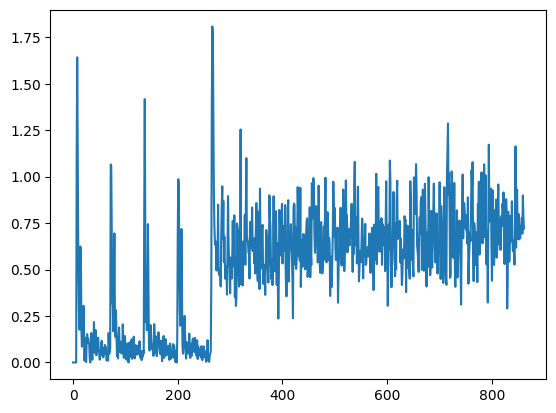

In [5]:
plt.plot(onset_env)

In [74]:
type(audio)

NameError: name 'audio' is not defined

In [10]:
# Detect pitches (notes) in the audio
pitches, magnitudes = librosa.core.piptrack(y=audio, sr=sr)

In [11]:
sr

44100

In [12]:
audio_segment = AudioSegment.from_mp3(audio_file, )

In [14]:
type(audio_segment)

pydub.audio_segment.AudioSegment

In [16]:
pitches.shape


(1025, 862)

In [17]:
magnitudes.shape

(1025, 862)

In [6]:
import numpy as np

In [43]:

import librosa
import numpy as np

audio_file = "Bilateral Music Therapy.mp3"

# Load the audio file
y, sr = librosa.load(audio_file, sr=None)
# Estimate pitches
pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)


        

In [76]:
y.shape

(159636480,)

In [16]:
# Get the strongest pitch at each frame
pitch_values = []
for t in range(pitches.shape[1]):
    
    index = magnitudes[:, t].argmax()
    pitch = pitches[index, t]
    if pitch > 0:  # Ignore non-positive values
        break
        pitch_values.append(pitch)

65

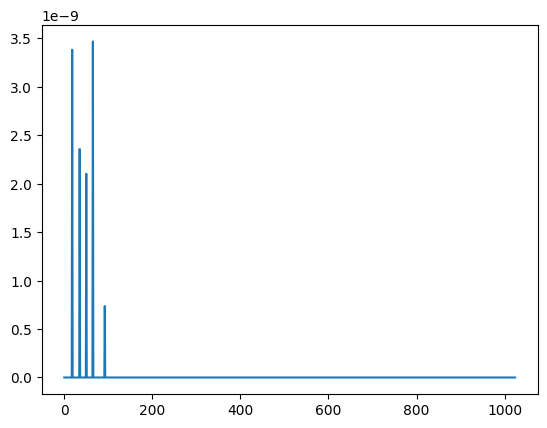

In [18]:
plt.plot(magnitudes[:, t])

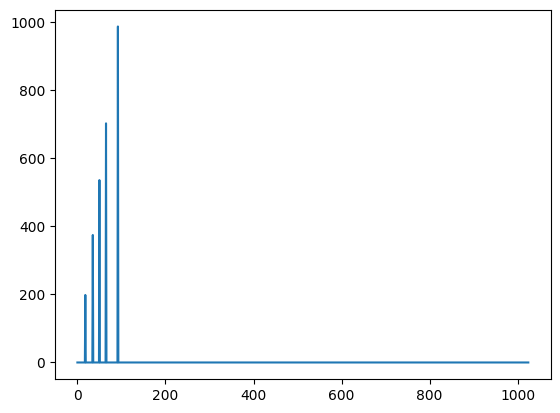

In [17]:
plt.plot(pitches[:, t])

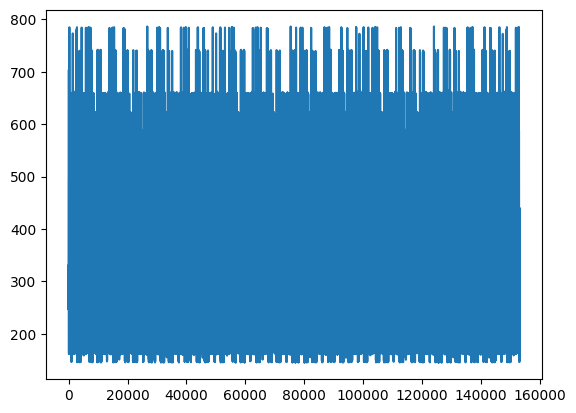

In [10]:
plt.plot(pitch_values)

In [2]:
import matplotlib.pyplot as plt

In [3]:
pitches.shape

(1025, 155896)

In [7]:
np.savez('Bilateral Music Therapy.npz', pitches=pitches, magnitudes=magnitudes)

In [20]:
np.save('Bilateral Music Therapy_pitches.npy', pitches)

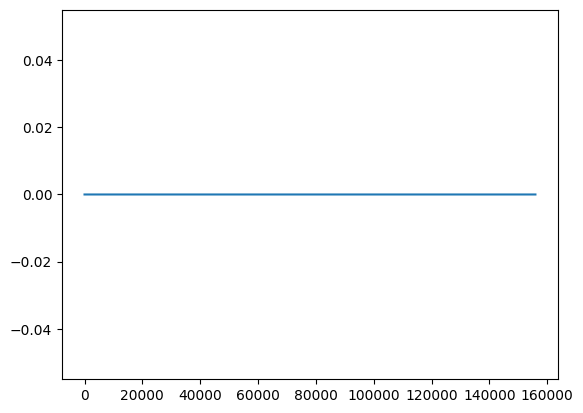

In [15]:
plt.plot(pitches[1000, :])

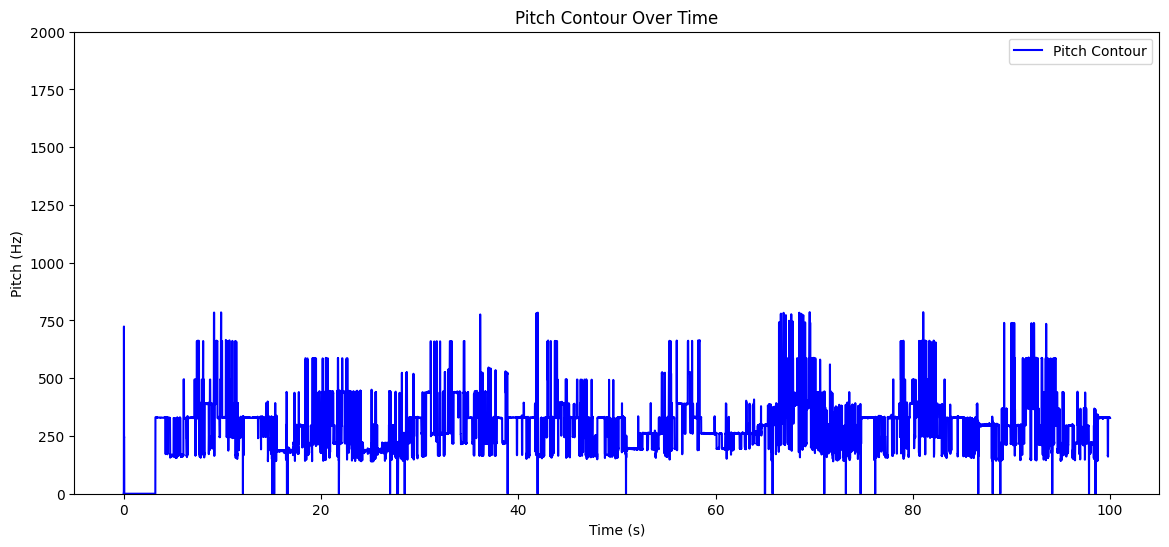

In [24]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load an example audio file
# y, sr = librosa.load(librosa.ex('trumpet'))

# Compute pitch and magnitude using piptrack
# pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)

# Create an array to hold the pitch contour
pitch_contour = np.zeros(pitches.shape[1])

# Extract the pitch contour
for t in range(pitches.shape[1]):
    index = magnitudes[:, t].argmax()
    pitch_contour[t] = pitches[index, t] if magnitudes[index, t] > 0 else 0

# Create time array
times = librosa.times_like(pitch_contour, sr=sr, hop_length=512)

# Plot the pitch contour over time
plt.figure(figsize=(14, 6))
plt.plot(times, pitch_contour, label='Pitch Contour', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (Hz)')
plt.title('Pitch Contour Over Time')
plt.ylim(0, 2000)  # Adjust the pitch range for visualization
plt.legend()
plt.show()


In [25]:
sr

44100

In [26]:
pitches, magnitudes

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [70]:
magnitudes.shape

(1025, 311791)

In [72]:
sr / 1000 / 512

0.0861328125

In [64]:
filtered_pitches =dict()
for t in range(pitches.shape[1]): 
    order = np.argsort(magnitudes[:,t])[::-1]
    if np.sum(magnitudes[order[:10],t]) > .0:
        filtered_pitches[t]=list(zip(magnitudes[order[:10], t], pitches[order[:10], t]))

        

In [66]:
import pickle

with open('pitches.pk', 'wb') as f: 
    pickle.dump(filtered_pitches,f)

In [67]:
with open('pitches.pk', 'rb') as f: 
    filtered_pitches=pickle.load(f)

In [69]:
filtered_pitches[1000]

[(12.992178, 200.01295),
 (9.0589075, 662.59393),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0)]

In [77]:
y.shape

(159636480,)

In [78]:
pitches.shape

(1025, 311791)

In [84]:
311791 * 512 

159636992

In [88]:
10001 // 10

1000

In [80]:
filtered_pitches = []
for t in range(pitches.shape[1]): 
    order = np.argsort(magnitudes[:,t])[::-1]
    filtered_pitches.append(list(zip(magnitudes[order[:10], t], pitches[order[:10], t])))
    
 

In [81]:
np.save('Bilateral Music Therapy_pitches.npy', filtered_pitches)

In [ ]:
import numpy as np
